In [1]:
import cvxpy as cp
import numpy as np
import osbdo as ob

(CVXPY) Oct 12 04:15:51 PM: Encountered unexpected exception importing solver SCS:
ImportError('dlopen(/opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/_scs_direct.cpython-310-darwin.so, 2): Symbol not found: _aligned_alloc\n  Referenced from: /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib (which was built for Mac OS X 10.15)\n  Expected in: /usr/lib/libSystem.B.dylib\n in /opt/anaconda3/envs/exp_env16/lib/python3.10/site-packages/scs-3.2.0-py3.10-macosx-10.9-x86_64.egg/scs/.dylibs/libgomp.1.dylib')


# Problem description
section 4.4 in https://web.stanford.edu/~boyd/papers/os_bundle_distr_opt.html 

# Create parameters

In [2]:
params = ob.fl_params(num_samples=10000, num_agents=10, size=500)

# Distributed solution

In [3]:
agents = ob.fl_agents(params)
g = ob.fl_coupling(agents, params)
prob = ob.Problem(agents = agents, g = g)

In [4]:
x_agent, x_global = prob.solve(rel_gap=10**(-5), abs_gap=10**(-5), max_iter=50)

k=0, rel_gap=1.6767373885077049e+21, L=4.133904243507362e-18, U=6931.471805599453
k=1, rel_gap=124.68584811634925, L=55.14918273999223, U=6931.471805599453
k=2, rel_gap=45.609700926622644, L=94.1643710403551, U=4388.973172134478
k=3, rel_gap=18.46377765933453, L=148.559777248358, U=2891.5344734823043
k=4, rel_gap=7.607941322410133, L=229.0400292706667, U=1971.5631324449982
k=5, rel_gap=4.351903848697235, L=268.1757038963974, U=1435.2505818102195
k=6, rel_gap=2.977528863629101, L=360.8397653463401, U=1435.2505818102195
k=7, rel_gap=2.0962455912809768, L=393.2717948011986, U=1217.6660608283682
k=8, rel_gap=1.7347143380279297, L=445.2626162432956, U=1217.6660608283682
k=9, rel_gap=1.3211206013544394, L=524.6026682619704, U=1217.6660608283682
k=10, rel_gap=1.1012095228410046, L=546.1186464954758, U=1147.509700617334
k=11, rel_gap=0.9755129120947289, L=580.8667174949394, U=1147.509700617334
k=12, rel_gap=0.8070534232733192, L=635.0170315046472, U=1147.509700617334
k=13, rel_gap=0.6977406533

# Centralized solution

In [5]:
x_cvx, prob_cvx, h_cvx = ob.cvx_federated_learning(params=params)

In [6]:
h_cvx, prob.upper_bnd[-1]

(1048.1800008315572, 1051.613086103349)

# Plot

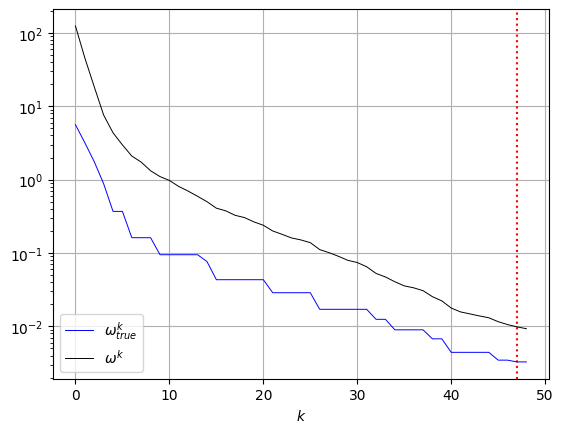

In [7]:
ob.plot_true_rel_gap_uk(lk = prob.lower_bnd, uk = prob.upper_bnd, h_true = h_cvx)